<a href="https://colab.research.google.com/github/eleanarey/TFM-MUII-UOC/blob/main/3er_experimento_CLIP_y_text_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ver repositorios de código en Github:  

- TFM Implementacion_de_Mobile_ViT: https://github.com/eleanarey/TFM-MUII-UOC/blob/main/Implementacion_de_Mobile_ViT.ipynb

- Qualcomm Mobile ViT: https://github.com/quic/ai-hub-models/tree/main/qai_hub_models/models/mobile_vit

- Apple Mobile ViT: https://github.com/apple/ml-cvnets/tree/main

- Vision Transformer: https://github.com/google-research/vision_transformer

- CLIP: https://github.com/openai/CLIP


---


# Referencias:

- Mehta, S., Rastegari, M., Caspi, A., & Hajishirzi, H. (2022). **MobileViT: Light-weight, General-purpose, and Mobile-friendly Vision Transformer**. *arXiv preprint arXiv:2110.02178*. Recuperado de [https://arxiv.org/abs/2110.02178](https://arxiv.org/abs/2110.02178)

- Howard, A. G., Zhu, M., Chen, B., Kalenichenko, D., Wang, W., Weyand, T., Andreetto, M., & Adam, H. (2017). **MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications**. *arXiv preprint arXiv:1704.04861*. Recuperado de [https://arxiv.org/abs/1704.04861](https://arxiv.org/abs/1704.04861)

- Sandler, M., Howard, A., Zhu, M., Zhmoginov, A., & Chen, L.-C. (2018). **MobileNetV2: Inverted Residuals and Linear Bottlenecks**. *arXiv preprint arXiv:1801.04381*. Recuperado de [https://arxiv.org/abs/1801.04381](https://arxiv.org/abs/1801.04381)

- Dosovitskiy, A., Beyer, L., Kolesnikov, A., Weissenborn, D., Zhai, X., Unterthiner, T., ... & Houlsby, N. (2020). **An Image Is Worth 16x16 Words: Transformers for Image Recognition at Scale (ViT)**. *arXiv preprint arXiv:2010.11929*. Recuperado de [https://arxiv.org/abs/2010.11929](https://arxiv.org/abs/2010.11929)

- Radford, A., Kim, J. W., Hallacy, C., Ramesh, A., Goh, G., Agarwal, S., ... & Sutskever, I. (2021). **Learning Transferable Visual Models From Natural Language Supervision (CLIP)**. *arXiv preprint arXiv:2103.00020*. Recuperado de [https://arxiv.org/pdf/2103.00020](https://arxiv.org/pdf/2103.00020)

- Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, Ł., & Polosukhin, I. (2017). **Attention Is All You Need (Transformers)**. *arXiv preprint arXiv:1706.03762*. Recuperado de [https://arxiv.org/abs/1706.03762](https://arxiv.org/abs/1706.03762)

---

# Ver proyectos en Hugging Face:

- Apple Mobile ViT Small: https://huggingface.co/apple/mobilevit-small

- Mobile ViT qualcomm: https://huggingface.co/qualcomm/Mobile_Vit

- MobileNets: https://huggingface.co/google/mobilenet_v2_1.0_224

- Vision Transformer (base-sized model): https://huggingface.co/google/vit-base-patch16-224-in21k

- CLIP: https://huggingface.co/openai/clip-vit-base-patch32

---

# Ver principales Datasets publicos referenciados y utilizados en los modelos:

- Tini ImageNet: https://paperswithcode.com/dataset/tiny-imagenet

- Imagenet: https://www.image-net.org/

- Flickr8k: https://huggingface.co/datasets/Naveengo/flickr8k

- MSRA-TD500: https://huggingface.co/datasets/yunusserhat/MSRA-TD500-Dataset

---

Código disponible en Colab:

<a href="https://colab.research.google.com/drive/1Cj246i8QJ8z3Z71Bbfhez4HU1LHlqzZG"
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the BSD 3-Clause License
# The license for the original implementation of Mobile_Vit
#Copyright (c) Soumith Chintala 2016,
#All rights reserved.

# https://github.com/pytorch/vision/blob/main/LICENSE

#Redistribution and use in source and binary forms, with or without
#modification, are permitted provided that the following conditions are met:
#
#* Redistributions of source code must retain the above copyright notice, this
#  list of conditions and the following disclaimer.
#
#* Redistributions in binary form must reproduce the above copyright notice,
#  this list of conditions and the following disclaimer in the documentation
#  and/or other materials provided with the distribution.
#
#* Neither the name of the copyright holder nor the names of its
#  contributors may be used to endorse or promote products derived from
#  this software without specific prior written permission.
#
#THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
#AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
#IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
#DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
#FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
#DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
#SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
#CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
#OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
#OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

In [ ]:
#@markdown Select whether you would like to store data in your personal drive.
#@markdown
#@markdown If you select **yes**, you will need to authorize Colab to access
#@markdown your personal drive
#@markdown
#@markdown If you select **no**, then any changes you make will diappear when
#@markdown this Colab's VM restarts after some time of inactivity...
use_gdrive = 'yes'  #@param ["yes", "no"]


if use_gdrive == 'yes':
  from google.colab import drive
  # Montar Google Drive
  # "comentamos esta celda y añadimos la siguiente" drive.mount('/gdrive')
  drive.mount('/content/drive', force_remount=True)
  # Ruta al archivo ZIP en Google Drive
  # "comentamos esta celda y añadimos la siguiente" root = '/gdrive/My Drive/vision_transformer_colab'
  root = "/content/drive/MyDrive/Colab_Notebooks"
  import os
  if not os.path.isdir(root):
    os.mkdir(root)
  os.chdir(root)
  print(f'\nChanged CWD to "{root}"')
else:
  from IPython import display
  display.display(display.HTML(
      '<h1 style="color:red">CHANGES NOT PERSISTED</h1>'))

Mounted at /content/drive

Changed CWD to "/content/drive/MyDrive/Colab_Notebooks"


# Implementacion de CLIP como comparacion del comportamiento del modelo tras el ajuste (Fine Tuning)

In [ ]:
# Verificar las dimensiones de salida
with torch.no_grad():
    dummy_input = torch.randn(1, 3, 224, 224).to(device)  # Imagen de ejemplo
    features = model.get_image_features(pixel_values=dummy_input)
    print("Dimensiones de las características de imagen:", features.shape)


Dimensiones de las características de imagen: torch.Size([1, 2])


Dimensiones de salida de las características de imagen:
torch.Size([1, 512])
Epoch 1/10, Loss: 1.7239, Validation Accuracy: 0.60%
Epoch 2/10, Loss: 0.7139, Validation Accuracy: 0.60%
Epoch 3/10, Loss: 0.6655, Validation Accuracy: 0.60%
Epoch 4/10, Loss: 0.6591, Validation Accuracy: 0.60%
Epoch 5/10, Loss: 0.6202, Validation Accuracy: 0.60%
Epoch 6/10, Loss: 0.4515, Validation Accuracy: 0.82%
Epoch 7/10, Loss: 0.6721, Validation Accuracy: 0.62%
Epoch 8/10, Loss: 0.5891, Validation Accuracy: 0.74%
Epoch 9/10, Loss: 0.5845, Validation Accuracy: 0.60%
Epoch 10/10, Loss: 0.7444, Validation Accuracy: 0.60%


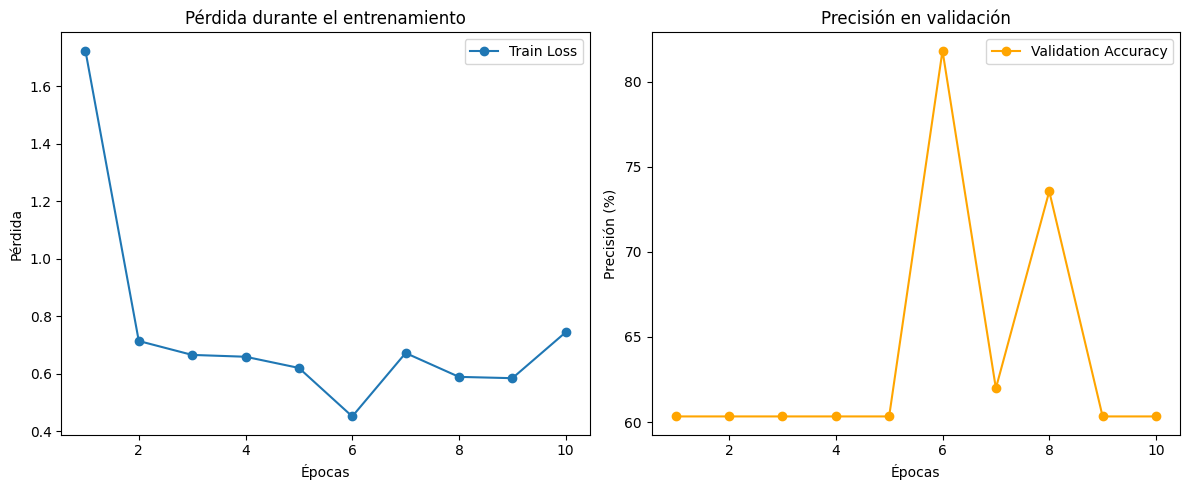

Modelo CLIP ajustado guardado.


In [ ]:
# 1. Configurar el modelo CLIP
#   Cargamos el modelo preentrenado CLIP y configuramos las últimas capas para
#   adaptarlo a la clasificación binaria (text y no_text).

from transformers import CLIPModel, CLIPProcessor
import torch.nn as nn
import torch

# Cargar el modelo CLIP preentrenado
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)

# Ajustar la capa personalizada (en este caso, no necesitamos cambiarla porque ya tiene 2 salidas)
print("Dimensiones de salida de las características de imagen:")
with torch.no_grad():
    dummy_input = torch.randn(1, 3, 224, 224).to(device)
    features = model.get_image_features(pixel_values=dummy_input)
    print(features.shape)

# 2. Preparar los datos
#    Configura las transformaciones con aumentación para el conjunto de entrenamiento
#    y normalización estándar para el conjunto de validación.

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Transformaciones para entrenamiento (con aumentación de datos)
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Transformaciones para validación (sin aumentación)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Dataset
dataset_path = "/content/drive/MyDrive/Colab_Notebooks/dataset/text_recognition_balanceado"
dataset = datasets.ImageFolder(root=dataset_path, transform=train_transform)

# Dividir en entrenamiento y validación
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Aplicar transformaciones específicas para validación
val_dataset.dataset.transform = val_transform

# Crear dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 3. Configurar el optimizador y la función de pérdida
#    Utilizamos un optimizador y una función de pérdida adecuados para el fine-tuning.
from torch.optim import AdamW

# Configurar pérdida y optimizador
criterion = nn.CrossEntropyLoss()  # Para clasificación binaria
optimizer = AdamW(model.parameters(), lr=1e-4)  # Usar una tasa de aprendizaje baja para fine-tuning

# 4. Entrenar el modelo
#     Implementamos el bucle de entrenamiento y evaluación, similar al de MobileViT,
#     para calcular la pérdida y precisión en cada época.
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Inicializar listas para métricas
train_losses = []
val_accuracies = []

num_epochs = 10
for epoch in range(num_epochs):
    # Entrenamiento
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model.get_image_features(pixel_values=inputs)  # Obtener características de imagen
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluación
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model.get_image_features(pixel_values=inputs)
            _, predictions = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    val_accuracies.append(accuracy * 100)

    # Imprimir métricas por época
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")

# 5. Graficar métricas
#    Grafica la pérdida y precisión para comparar visualmente con MobileViT.
plt.figure(figsize=(12, 5))

# Pérdida de entrenamiento
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss", marker='o')
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Pérdida durante el entrenamiento")
plt.legend()

# Precisión en validación
plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", color="orange", marker='o')
plt.xlabel("Épocas")
plt.ylabel("Precisión (%)")
plt.title("Precisión en validación")
plt.legend()

plt.tight_layout()
plt.show()

# 6. Guardar el modelo ajustado
#    Guarda el modelo ajustado para comparaciones futuras.
torch.save(model.state_dict(), "/content/drive/MyDrive/Colab_Notebooks/clip_text_classification.pth")
print("Modelo CLIP ajustado guardado.")

# 7. Se usa una matriz de confusión para visualizar cómo el modelo
# clasifica las imágenes

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusión
cm = confusion_matrix(all_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


Dimensiones de salida de las características de imagen:
torch.Size([1, 512])
Epoch 1/10, Loss: 1.5689, Validation Accuracy: 0.66%
Epoch 2/10, Loss: 0.5089, Validation Accuracy: 0.92%
Epoch 3/10, Loss: 0.3999, Validation Accuracy: 0.75%
Epoch 4/10, Loss: 0.2083, Validation Accuracy: 0.86%
Epoch 5/10, Loss: 0.0726, Validation Accuracy: 0.83%
Epoch 6/10, Loss: 0.1600, Validation Accuracy: 0.36%
Epoch 7/10, Loss: 1.1768, Validation Accuracy: 0.64%
Epoch 8/10, Loss: 0.5783, Validation Accuracy: 0.64%
Epoch 9/10, Loss: 0.3514, Validation Accuracy: 0.79%
Epoch 10/10, Loss: 0.2326, Validation Accuracy: 0.81%


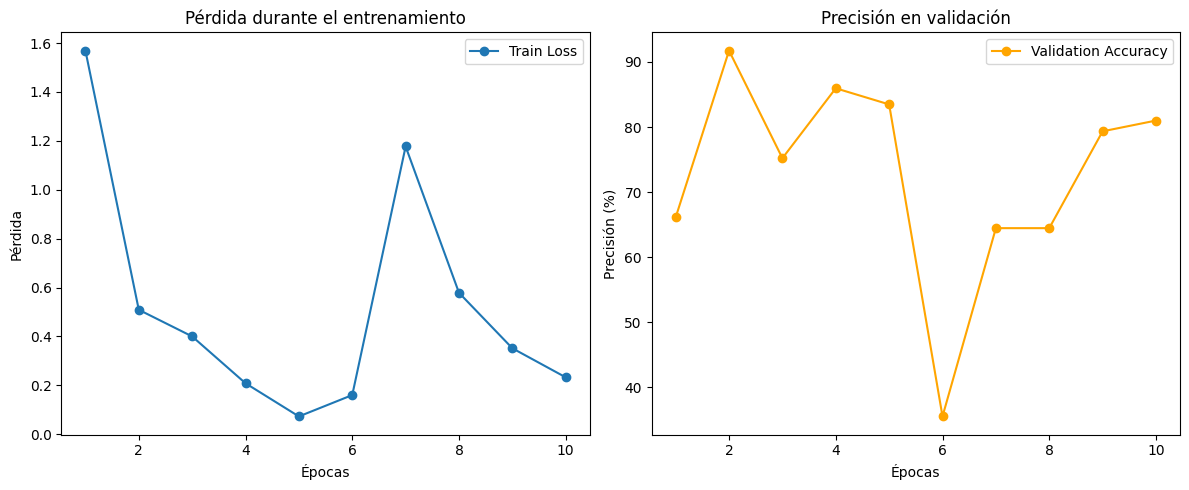

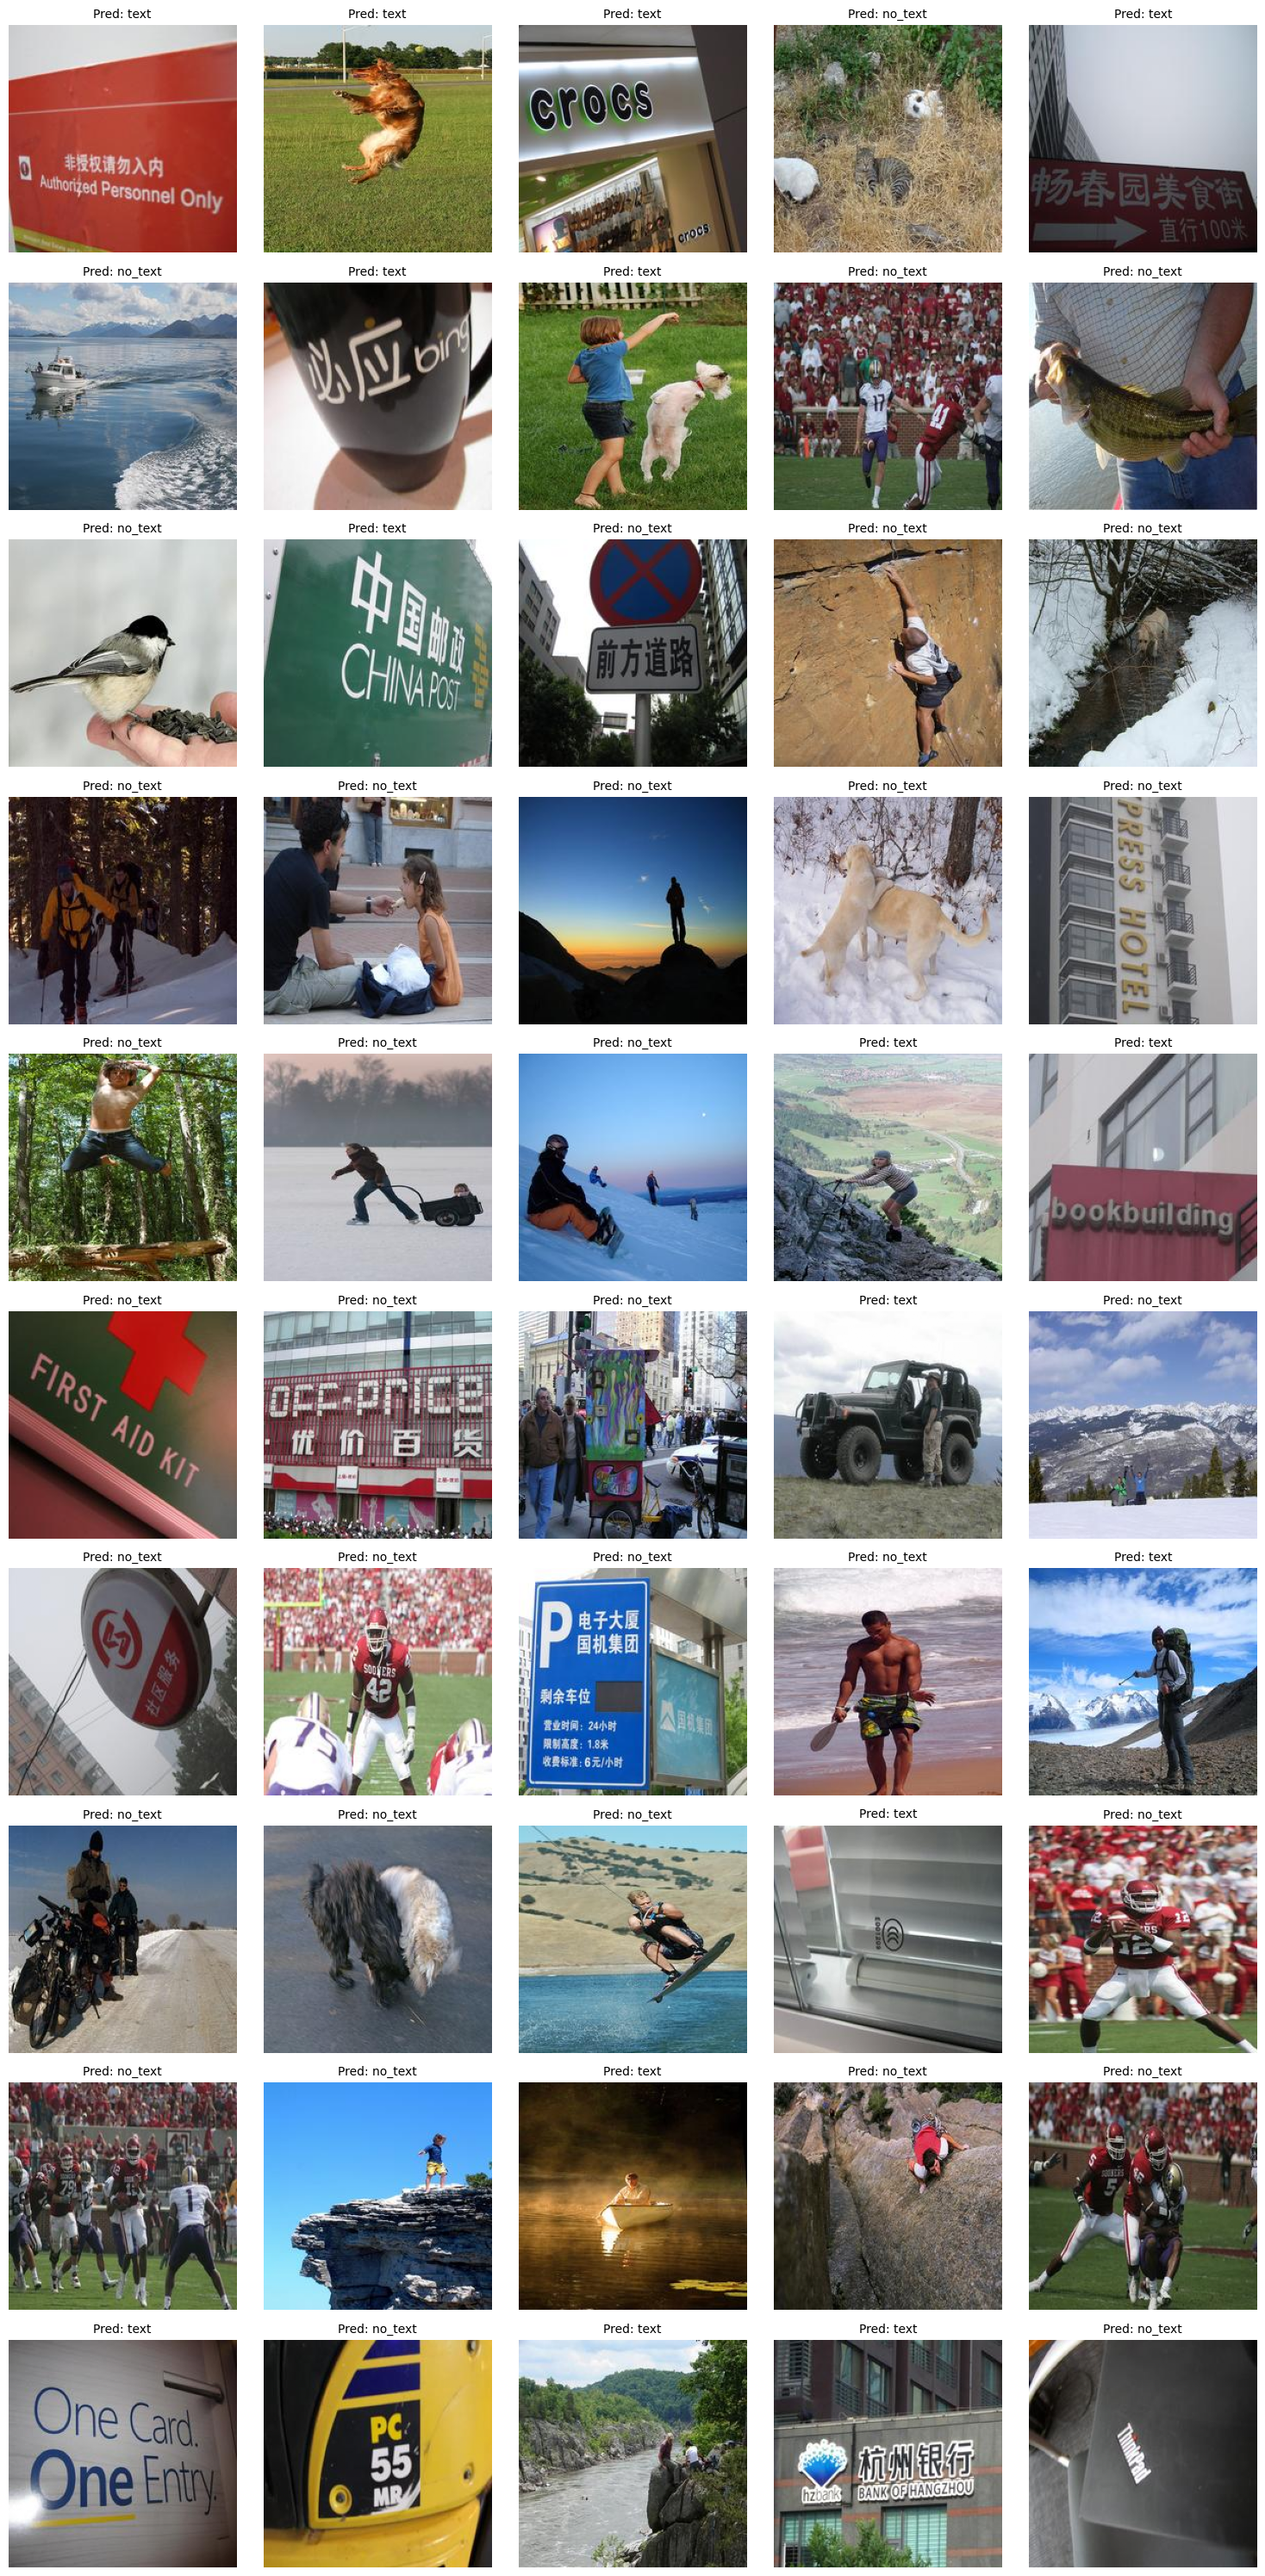

Modelo CLIP ajustado guardado.


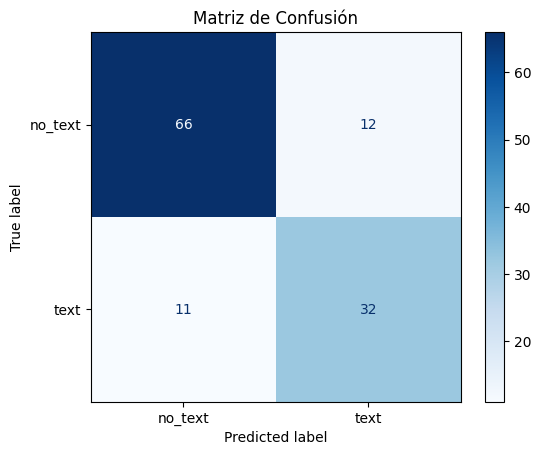

In [ ]:
# 1. Configurar el modelo CLIP
#   Cargamos el modelo preentrenado CLIP y configuramos las últimas capas para
#   adaptarlo a la clasificación binaria (text y no_text).

from transformers import CLIPModel, CLIPProcessor
import torch.nn as nn
import torch

# Cargar el modelo CLIP preentrenado
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)

# Ajustar la capa personalizada (en este caso, no necesitamos cambiarla porque ya tiene 2 salidas)
print("Dimensiones de salida de las características de imagen:")
with torch.no_grad():
    dummy_input = torch.randn(1, 3, 224, 224).to(device)
    features = model.get_image_features(pixel_values=dummy_input)
    print(features.shape)

# 2. Preparar los datos
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Transformaciones para entrenamiento (con aumentación de datos)
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Transformaciones para validación (sin aumentación)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Dataset
dataset_path = "/content/drive/MyDrive/Colab_Notebooks/dataset/text_recognition_balanceado"
dataset = datasets.ImageFolder(root=dataset_path, transform=train_transform)

# Dividir en entrenamiento y validación
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Aplicar transformaciones específicas para validación
val_dataset.dataset.transform = val_transform

# Crear dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 3. Configurar el optimizador y la función de pérdida
from torch.optim import AdamW

# Configurar pérdida y optimizador
criterion = nn.CrossEntropyLoss()  # Para clasificación binaria
optimizer = AdamW(model.parameters(), lr=1e-4)  # Usar una tasa de aprendizaje baja para fine-tuning

# 4. Entrenar el modelo
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Inicializar listas para métricas
train_losses = []
val_accuracies = []

# Listas para mostrar imágenes y predicciones
evaluated_images = []
evaluated_predictions = []

num_epochs = 10
for epoch in range(num_epochs):
    # Entrenamiento
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model.get_image_features(pixel_values=inputs)  # Obtener características de imagen
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluación
    model.eval()
    all_labels = []
    all_predictions = []
    evaluated_images.clear()
    evaluated_predictions.clear()
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model.get_image_features(pixel_values=inputs)
            _, predictions = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

            # Guardar imágenes y predicciones para mostrar
            if len(evaluated_images) < 50:  # Limitar a 50 imágenes
                evaluated_images.extend(inputs.cpu())
                evaluated_predictions.extend(predictions.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    val_accuracies.append(accuracy * 100)

    # Imprimir métricas por época
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")

# 5. Graficar métricas
plt.figure(figsize=(12, 5))

# Pérdida de entrenamiento
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss", marker='o')
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Pérdida durante el entrenamiento")
plt.legend()

# Precisión en validación
plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", color="orange", marker='o')
plt.xlabel("Épocas")
plt.ylabel("Precisión (%)")
plt.title("Precisión en validación")
plt.legend()

plt.tight_layout()
plt.show()

# 6. Mostrar imágenes evaluadas
def show_image_grid(images, predictions, classes, rows=10, cols=5):
    """
    Muestra un grid de imágenes con sus predicciones.

    Args:
        images: Lista de imágenes (tensores).
        predictions: Lista de predicciones.
        classes: Lista con nombres de las clases.
        rows: Número de filas en el grid.
        cols: Número de columnas en el grid.
    """
    fig, axes = plt.subplots(rows, cols, figsize=(15, 30))
    axes = axes.flatten()

    for img, pred, ax in zip(images[:rows * cols], predictions[:rows * cols], axes):
        # Convertir tensor a imagen y desnormalizar
        img = img.permute(1, 2, 0).numpy()  # Cambiar ejes a (H, W, C)
        img = (img * 0.5) + 0.5  # Desnormalizar
        img = img.clip(0, 1)  # Asegurar rango [0, 1]

        ax.imshow(img)
        ax.set_title(f"Pred: {classes[pred]}", fontsize=10)
        ax.axis('off')

    for ax in axes[len(images):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Clases del modelo
classes = ['no_text', 'text']

# Mostrar 50 imágenes evaluadas
show_image_grid(evaluated_images, evaluated_predictions, classes, rows=10, cols=5)

# 7. Guardar el modelo ajustado
torch.save(model.state_dict(), "/content/drive/MyDrive/Colab_Notebooks/clip_text_classification_v1.pth")
print("Modelo CLIP ajustado guardado.")

# 8. Se usa una matriz de confusión para visualizar cómo el modelo
# clasifica las imágenes

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusión
cm = confusion_matrix(all_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


### **Interpretación de la Matriz de Confusión**
#### **Ejes de la matriz**:
- El eje **vertical** representa las **etiquetas reales** del conjunto de validación.
- El eje **horizontal** representa las **predicciones del modelo**.

#### **Valores en la matriz**:
- **(66)**: Cantidad de imágenes correctamente clasificadas como `no_text`.
- **(32)**: Cantidad de imágenes correctamente clasificadas como `text`.
- **(12)**: Cantidad de imágenes clasificadas incorrectamente como `text` cuando eran `no_text`.
- **(11)**: Cantidad de imágenes clasificadas incorrectamente como `no_text` cuando eran `text`.

---

### **Análisis del Modelo**
#### **Rendimiento general**:
- El modelo muestra un rendimiento **bueno** con respecto a las clasificaciones correctas en ambas clases (`no_text` y `text`).

#### **Errores predominantes**:
- El modelo comete errores moderados en ambas clases:
  - **12 casos** en los que imágenes de `no_text` fueron clasificadas como `text`.
  - **11 casos** en los que imágenes de `text` fueron clasificadas como `no_text`.

Esto podría deberse a:
- **Similitudes visuales** entre las clases, especialmente en casos límite.
- **Limitaciones del conjunto de datos**, como tamaño reducido o falta de diversidad en las muestras.

#### **Clasificaciones correctas**:
- **98 imágenes clasificadas correctamente**:
  - `no_text`: 66 correctas.
  - `text`: 32 correctas.

#### **Tasa de error**:
- **Errores totales**:
  - \( 12 \) (falsos positivos) + \( 11 \) (falsos negativos) = \( 23 \) errores.
- **Precisión del modelo**:
  Precisión = correctas\total = 98/121 ≈ 81.0%


<ipython-input-39-295f35bf4506>:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/drive/MyDrive/Colab_Notebooks/clip_text_classifi

Modelo CLIP ajustado cargado correctamente.


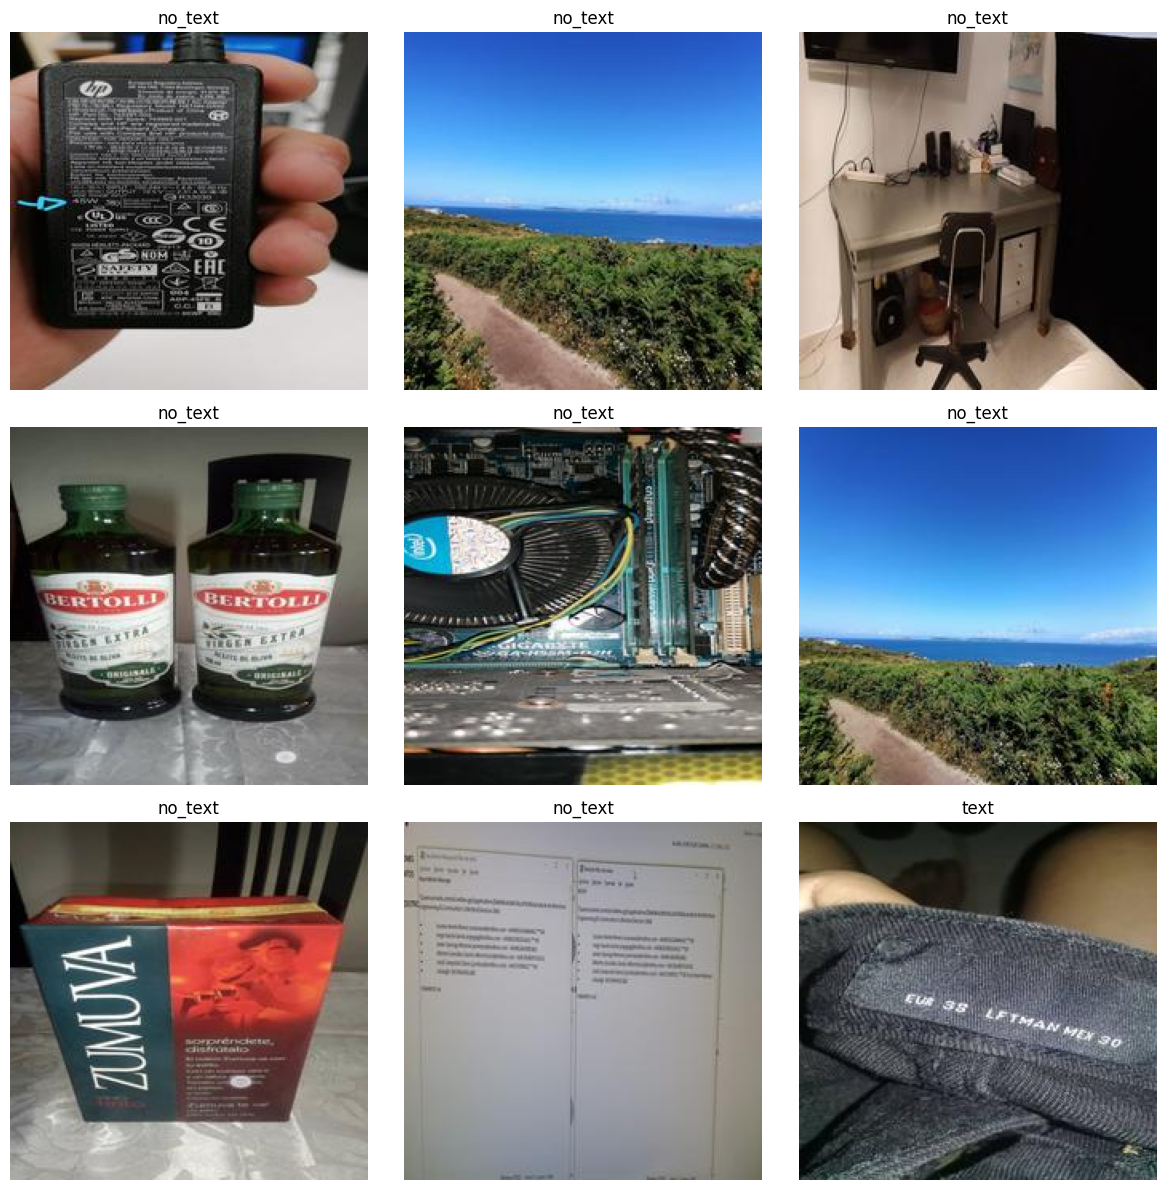

In [ ]:
# INFERENCIA
# Del modelo CLIP ajustado y guardado

from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os

# Inicializar el modelo CLIP ajustado y el procesador
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Cargar los pesos del modelo ajustado
model.load_state_dict(torch.load("/content/drive/MyDrive/Colab_Notebooks/clip_text_classification_v1.pth"))
print("Modelo CLIP ajustado cargado correctamente.")

# Clases objetivo (ajustadas según el entrenamiento)
classes = ["no_text", "text"]

# Función para evaluar imágenes en un directorio usando el modelo ajustado
def evaluate_images_with_adjusted_clip(model, processor, directory_path, device, max_images=9):
    """
    Evalúa todas las imágenes en un directorio y muestra un grid con las predicciones del modelo CLIP ajustado.

    Args:
        model: Modelo CLIP ajustado.
        processor: Procesador asociado al modelo CLIP.
        directory_path: Ruta al directorio con imágenes.
        device: Dispositivo (CPU/GPU) en el que correr el modelo.
        max_images: Número máximo de imágenes a mostrar en el grid (default: 9).
    """
    # Obtener la lista de imágenes en el directorio
    image_paths = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if not image_paths:
        print("No se encontraron imágenes en el directorio.")
        return

    # Limitar al número máximo de imágenes
    image_paths = image_paths[:max_images]

    images = []
    predictions = []

    model.eval()  # Modo evaluación
    with torch.no_grad():
        for img_path in image_paths:
            # Cargar la imagen y procesarla
            img = Image.open(img_path).convert("RGB")
            inputs = processor(images=img, return_tensors="pt", padding=True).to(device)

            # Realizar la inferencia con el modelo ajustado
            outputs = model.get_image_features(**inputs)
            probs = torch.softmax(outputs, dim=1)

            # Guardar la imagen y la predicción
            pred_class = classes[torch.argmax(probs).item()]
            images.append(img)
            predictions.append(pred_class)

    # Mostrar las imágenes en un grid
    show_image_grid(images, predictions)


# Función para mostrar un grid de imágenes con títulos
def show_image_grid(images, titles, rows=3, cols=3):
    """
    Muestra un grid de imágenes con títulos.

    Args:
        images: Lista de imágenes (PIL Images).
        titles: Lista de títulos para cada imagen.
        rows: Número de filas en el grid.
        cols: Número de columnas en el grid.
    """
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    axes = axes.flatten()

    for img, title, ax in zip(images, titles, axes):
        ax.imshow(img)
        ax.set_title(title, fontsize=12)
        ax.axis('off')

    # Ocultar los ejes adicionales si hay menos imágenes que slots
    for ax in axes[len(images):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Ruta al directorio con imágenes
directory_path = "/content/drive/MyDrive/Colab_Notebooks/dataset/images/DescargasdeAmazonPhotos/WhatsAppImagesPruebaTexto"

# Evaluar y mostrar resultados
evaluate_images_with_adjusted_clip(model, processor, directory_path, device, max_images=9)
